###                                  Project on Zomato Bangalore Restaurants

url : contains the url of the restaurant in the zomato website

address : contains the address of the restaurant in Bengaluru

name : contains the name of the restaurant

online_order : whether online ordering is available in the restaurant or not

book_table : table book option available or not

rate :  contains the overall rating of the restaurant out of 5

votes : contains total number of rating for the restaurant as of the above mentioned date

phone : contains the phone number of the restaurant

location :  contains the neighborhood in which the restaurant is located

rest_type  : restaurant type

dish_liked : dishes people liked in the restaurant

cuisines :  food styles, separated by comma

approx_cost(for two people) : contains the approximate cost for meal for two people

reviews_list : list of tuples containing reviews for the restaurant, each tuple

menu_item : contains list of menus available in the restaurant

listed_in(type) : type of meal

listed_in(city) : contains the neighborhood in which the restaurant is listed

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [87]:
#Load data
Zomato=pd.read_csv('zomato.csv')
Zomato.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [88]:
#Check dimension
Zomato.shape

(51717, 17)

### Data Preprocessing

In [89]:
#Check info
Zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

Interpretation:
    
    * rate  feature is wrongly mentioned as object so we need to change the data type to int.
    * phone feature also mentioned as object so need to change to int data type.
    * approx_cost(for two people) feature mentioned as object, we need to change to int type.
    * dish_liked feature as more missing values.
    * rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people) -these features are also has missing values.

In [90]:
#Check 5 point summary
Zomato.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
url,51717,51717,https://www.zomato.com/bangalore/assi-tussi-la...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
address,51717,11495,Delivery Only,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,51717,8792,Cafe Coffee Day,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
online_order,51717,2,Yes,30444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
book_table,51717,2,No,45268,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rate,43942,64,NEW,2208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
votes,51717,NaN,NaN,NaN,283.698,803.839,0,7,41,198,16832
phone,50509,14926,080 43334321,216,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,51696,93,BTM,5124,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rest_type,51490,93,Quick Bites,19132,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
#check number of restaurants
print('No of Restaurants in bangalore is :',Zomato['name'].nunique())   # registered in zomato website

No of Restaurants in bangalore is : 8792


    'url' column does not play a major rule so drop.
    'address','listed(city)' are dropped because 'location' feature tells the same information.
    'phone' feature are required so drop it

In [92]:
Zomato.drop(['url', 'address', 'phone', 'listed_in(city)'], axis = 1, inplace = True)

In [93]:
#Check missing values

missing_val=Zomato.isnull().sum()
percent_miss=missing_val*100/len(Zomato)

missing_data=pd.DataFrame({'Missing values':missing_val,'Percentage missing values':percent_miss})
missing_data

,Missing values,Percentage missing values
name,0,0.000000
online_order,0,0.000000
book_table,0,0.000000
rate,7775,15.033741
votes,0,0.000000
location,21,0.040606
rest_type,227,0.438927
dish_liked,28078,54.291626
cuisines,45,0.087012
approx_cost(for two people),346,0.669026


In [94]:
Zomato_copy=Zomato.copy()

In [95]:
#drop dish_liked feature bcoz missing value percent>50%
Zomato.drop(columns=['dish_liked'],inplace=True)

In [96]:
len(Zomato[Zomato['rate']=='-'])

69

In [97]:
#replace those rows which are having '-' with nan 

Zomato['rate']=Zomato['rate'].replace('-',np.nan)

In [98]:
#Missing values treatment
#drop those rows which has missing values

Zomato.dropna(axis=0,inplace=True)
Zomato.reset_index(drop=True).head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet


In [99]:
#check any null values presence
Zomato.isnull().sum().sum()

0

In [100]:
#sns.heatmap(Zomato.isnull(),cmap='seismic_r',annot=True)

All missing vaulues are dropped because we dont know the domain knowledge.

In [101]:
Zomato.shape  # dimensions are reduced 

(43468, 12)

In [102]:
Zomato.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [103]:
# rate column has 'NEW' value  which indicates new resturtant,we dont know the exact technique to treat this value, 
#so we are giving average rate out of 5

Zomato.rate=Zomato.rate.replace('NEW','2.5/5')
Zomato.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '2.5/5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '3.4 /5',
       '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5',
       '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5', '3.5 /5',
       '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5', '4.3 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5', '4.9 /5',
       '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

Now NEW value is replaced with 2.5/5 

In [104]:
Zomato.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet


In [105]:
#Now we know that given ratings are out 5 so we need to split the ratings like 4.1/5 to 4.1
Zomato['rate']=Zomato['rate'].apply(lambda x: x.split('/')[0])


In [106]:
Zomato.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet


In [107]:
Zomato['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '6,000', '1,050', '2,300',
       '4,100', '120', '5,000', '3,700', '1,650', '2,700', '4,500'],
      dtype=object)

In [108]:
Zomato['approx_cost(for two people)'] = Zomato['approx_cost(for two people)'].apply(lambda x : x.replace(',', ''))

In [109]:
#now change the data types
Zomato['rate']=Zomato['rate'].astype(float)
Zomato['approx_cost(for two people)']=Zomato['approx_cost(for two people)'].astype(int)

In [110]:
#now data types are changed.

In [111]:
Zomato.head(5)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet


In [112]:
Zomato.drop(['menu_item'],1,inplace=True)

In [113]:
Zomato.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet


In [114]:
## Removal of Puctuations
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    #custom function to remove the punctuation
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

Zomato["reviews_list"] = Zomato["reviews_list"].apply(lambda text: remove_punctuation(text))
Zomato[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
13454,Rated 30 RATEDn Tried Peri Peri french fries ...,"Cafe, Sandwich, Pizza, North Indian, Mexican"
17565,Rated 10 RATEDn Was in my bucket list since s...,"Cafe, Continental"
9115,Rated 40 RATEDn Located in a very convenient ...,"North Indian, Arabian, Chinese"
26570,Rated 40 RATEDn Wasnt here for a long time Ju...,"Cafe, American, Continental, Italian"
20541,Rated 30 RATEDn TastynnA good place for your ...,"South Indian, Biryani, North Indian"


In [115]:
Zomato.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Rated 40 RATEDn A beautiful place to dine inT...,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Rated 40 RATEDn Had been here for dinner with...,Buffet


In [116]:
!pip install wordcloud

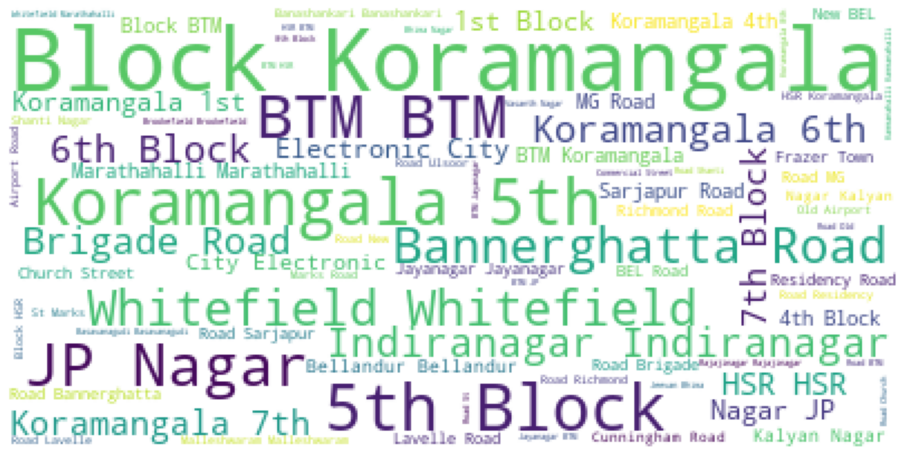

In [117]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(Zomato['location']))
print(wordcloud)
plt.figure(figsize=(16,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()



Interpretation:

    * Most restuarants are located at Koramangala,BTM layout,Bannerghatta Road.WhiteField,JP nagar etc..

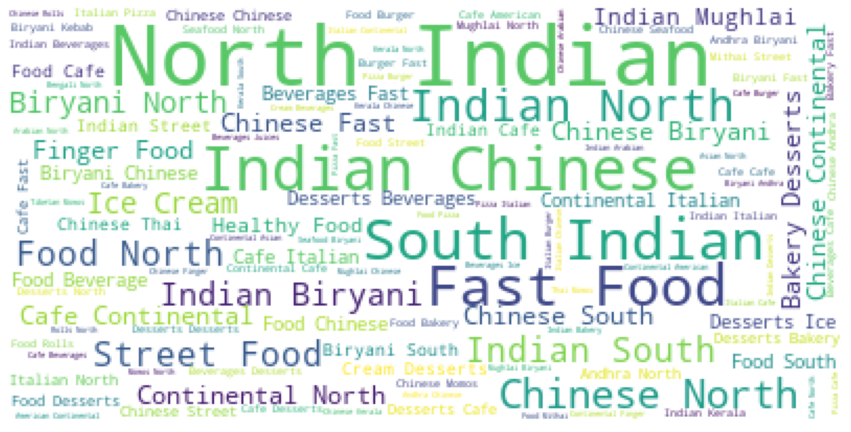

In [118]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(Zomato['cuisines']))
print(wordcloud)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Interpretation:
    
    * In bangalore most ordered cuisines are North indian,Indian chinese,Fast Food,South Indian,Chinese North,Indian Biryani etc..

C:\Users\SJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


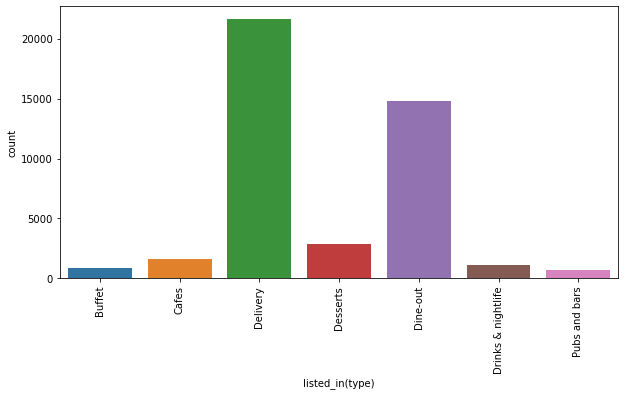

In [119]:
#Check 
plt.figure(figsize=(10,5))
sns.countplot(Zomato['listed_in(type)'],orient='h')
plt.xticks(rotation=90)
plt.show()

Interpretation:
    
    * In Bangalore most of the peoples ordered their dishes from restuarants. 

In [120]:
Zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43468 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         43468 non-null  object 
 1   online_order                 43468 non-null  object 
 2   book_table                   43468 non-null  object 
 3   rate                         43468 non-null  float64
 4   votes                        43468 non-null  int64  
 5   location                     43468 non-null  object 
 6   rest_type                    43468 non-null  object 
 7   cuisines                     43468 non-null  object 
 8   approx_cost(for two people)  43468 non-null  int32  
 9   reviews_list                 43468 non-null  object 
 10  listed_in(type)              43468 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(8)
memory usage: 5.1+ MB


C:\Users\SJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='online_order', ylabel='count'>

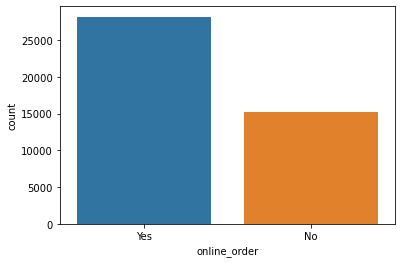

In [121]:
#Check how restuarants accepts online orders

sns.countplot(Zomato['online_order'])


interpretation:
    
    * Most of the restuarants accepts online orders.

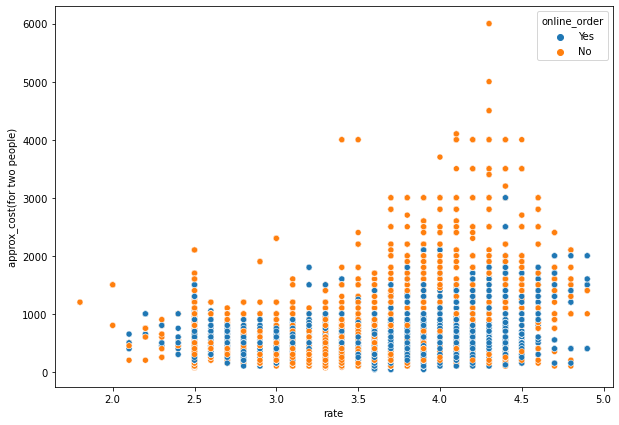

In [122]:
#check rate vs cost
plt.figure(figsize=(10,7))
sns.scatterplot(x="rate",y='approx_cost(for two people)',hue='online_order',data=Zomato)
plt.show()

Interpretation:
    
    * Good rated resturants costs are more compared to less rated.

C:\Users\SJ\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


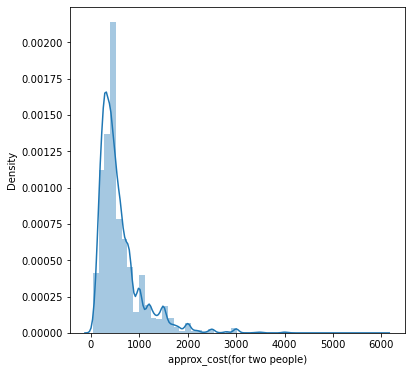

In [123]:
#check distribution of cost
plt.figure(figsize=(6,6))
sns.distplot(Zomato['approx_cost(for two people)'])
plt.show()

C:\Users\SJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SJ\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


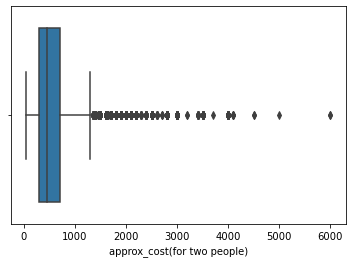

In [124]:
sns.boxplot(Zomato['approx_cost(for two people)'])
plt.show()

Interpretation:
    
    * Cost ranges from 0 to 6000, but median cost is 400 to 600.

In [125]:
#Popularity based Recommendation

In [126]:
#Top 10 restuarants overall based on top rating
top_10_restuarant=pd.DataFrame(Zomato.groupby(['name'])['rate'].mean().sort_values(ascending=False))
top_10_restuarant.head(10)

,rate
name,
Asia Kitchen By Mainland China,4.900000
SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Spa Cuisine,4.900000
Byg Brewski Brewing Company,4.900000
Punjab Grill,4.871429
Belgian Waffle Factory,4.844828
O.G. Variar & Sons,4.800000
Flechazo,4.800000
The Pizza Bakery,4.800000
AB's - Absolute Barbecues,4.789474


In [127]:
# Top rated restuarants in BTM layout for North indian cuisines

top_restuar_north_indian_BTM=Zomato[(Zomato['location']=='BTM') & (Zomato['cuisines']=='North Indian')]
top_10_restuar_BTM=pd.DataFrame(top_restuar_north_indian_BTM.groupby(['name']).agg({'rate':'max',"approx_cost(for two people)":'min','votes':'count'}).sort_values(by="rate",ascending=False))
top_10_restuar_BTM.head(10)

,rate,approx_cost(for two people),votes
name,,,
Roti Wala,4.2,300,11
Punjabi by Nature 2.0,4.2,1600,5
Swad Punjab Da,4.1,150,13
Nanna Munna Paratha House,4.0,300,14
Bathinda Junction,3.9,600,6
Bathinda Tandoor,3.9,300,9
Punjabi Swag,3.9,500,9
King Punjabi Restaurant,3.8,300,6
BTM Ghar ka Khana,3.7,200,4


Interpretation:
    
    * For North indian dishes in  BTM layout Roti wala restuarants is good because it has good ratings,less price and votes also good compared other resturants.

In [128]:
#top restuarants for briyani in Koramangala 5th Block 
top_restuar_briyani_kor=Zomato[(Zomato['location']=='Koramangala 5th Block') & (Zomato['cuisines']=='Biryani')]
top_10_restuar_Koramangala=pd.DataFrame(top_restuar_briyani_kor.groupby(['name']).agg({'rate':'max',"approx_cost(for two people)":'min','votes':'count'}).sort_values(by=["rate"],ascending=False))
top_10_restuar_Koramangala.head(10)

,rate,approx_cost(for two people),votes
name,,,
Mani's Dum Biryani,3.9,750,2
Village Donne Biryani,3.3,300,11


Interpretation:
    
    * In Kormangala 5 block only 2 briyani restuarants are there and top rated restuarant was `Manis Dum Biryani` but votes are less and even though cost is also too high compared Village Donne Biryani restuarant.. so Village Donne Biryani restuarant is good in terms of cost and votes.

In [129]:
#Content based recommendation

In [130]:
Zomato.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Rated 40 RATEDn A beautiful place to dine inT...,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Rated 40 RATEDn Had been here for dinner with...,Buffet


In [131]:
dishes=Zomato['cuisines'].str.split(',',expand=True)
dishes=dishes.iloc[:,0:3]

In [132]:
dishes.columns=['Cat1','Cat2','Cat3']
dishes.head(2)

,Cat1,Cat2,Cat3
0,North Indian,Mughlai,Chinese
1,Chinese,North Indian,Thai


In [133]:
feat=['name','rate','votes']
data=Zomato[feat]

Zomato2=pd.concat([data,dishes],1)
Zomato2.head(2)

,name,rate,votes,Cat1,Cat2,Cat3
0,Jalsa,4.1,775,North Indian,Mughlai,Chinese
1,Spice Elephant,4.1,787,Chinese,North Indian,Thai


In [134]:
Zomato2=Zomato2.drop_duplicates()

In [135]:
Zomato2=Zomato2.reset_index(drop=True)

In [136]:
Zomato2.index=Zomato2['name']

In [137]:
Zomato2.drop(columns=['name'],inplace=True)

In [138]:
Zomato2.head(2)

,rate,votes,Cat1,Cat2,Cat3
name,,,,,
Jalsa,4.1,775,North Indian,Mughlai,Chinese
Spice Elephant,4.1,787,Chinese,North Indian,Thai


In [139]:
Zomato3=pd.get_dummies(Zomato2)
Zomato3=Zomato3.dropna()

In [140]:
Zomato3.shape

(17527, 256)

In [141]:
from sklearn.neighbors import NearestNeighbors

model=NearestNeighbors(metric='cosine')
model.fit(Zomato3)

NearestNeighbors(metric='cosine')

In [142]:
query_index=200
dist,ind=model.kneighbors(Zomato3.iloc[query_index,:].values.reshape(1,-1),n_neighbors=5)

In [143]:
for i in range(0,len(dist[0])):
    if i==0:
        print('Top 5 restruants Recommendations for the user who ordered from this restruarants :',Zomato3.index[query_index])
    else:
        print(i,Zomato3.index[ind[0][i]])

Top 5 restruants Recommendations for the user who ordered from this restruarants : RS Shiv Sagar
1 Sip n Dine
2 Gokul Kuteera
3 Gokul Kuteera
4 Saarangi Fine Dining


Interpretation:
    
    * Suppose one person like food in RS Shiv Sagar restruants then he may like food in Sip n Dine or Gokul kuteera or Saarangi Fine Dining restruants.

In [144]:
Zomato.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Rated 40 RATEDn A beautiful place to dine inT...,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Rated 40 RATEDn Had been here for dinner with...,Buffet


In [145]:
#pca

In [147]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [148]:
Zomato_duplicate=Zomato.copy()
feat=['rate','votes','approx_cost(for two people)']

Zomato_df=Zomato_duplicate[feat]
Zomato_df.head(2)


,rate,votes,approx_cost(for two people)
0,4.1,775,800
1,4.1,787,800


In [149]:
sc = StandardScaler()
std_df = pd.DataFrame(sc.fit_transform(Zomato_df),columns=Zomato_df.columns)
std_df.head(2)

,rate,votes,approx_cost(for two people)
0,0.911862,0.508958,0.445468
1,0.911862,0.522832,0.445468


In [152]:
pca=PCA()
pca_model=pca.fit_transform(std_df)

print(pca.explained_variance_ratio_)

[0.58890263 0.2164684  0.19462898]


Interpretation:

    *PCA1 explains about 58.8% of variance of the data.
    *PCA2 and PCA3 explains about 21.6% and 19.4%  of variance of the data respectively.

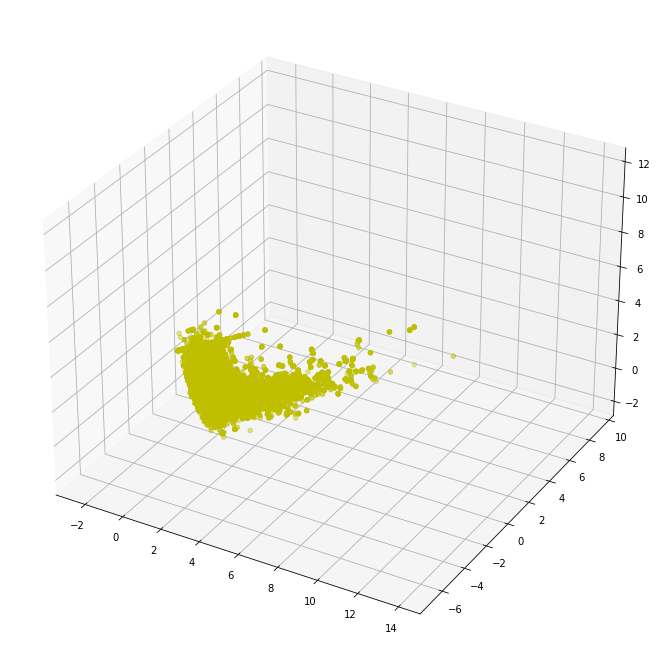

In [153]:
fig=plt.figure(figsize=(16,9))
ax = Axes3D(fig)
ax.scatter(pca_model[:,0],pca_model[:,1],pca_model[:,2],color="y")

In [156]:
Zomata_pca=pd.DataFrame(pca_model)

from sklearn.cluster import KMeans
inertia=np.empty(8)
for i in range(2,8):
    model=KMeans(n_clusters=i,random_state=20)
    model.fit(Zomata_pca)
    inertia[i]=model.inertia_

In [157]:
inertia

array([    0.        ,     0.        , 82635.51371828, 60860.74823461,
       44614.90374815, 37707.13766288, 30913.93268391, 26304.71223501])

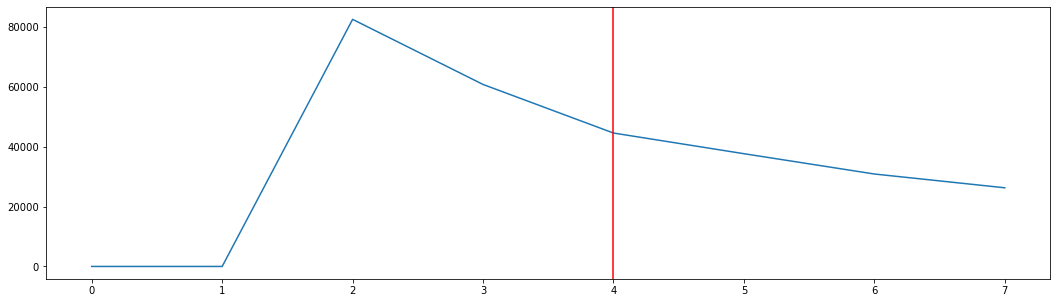

In [160]:
plt.figure(figsize=(18,5))
plt.plot(inertia)
plt.axvline(4,color="red")

Interpretation:
    
    * From the graph we see that k=4 is good for best clustering.

In [161]:
#print labels 
cluster=KMeans(n_clusters=4).fit(Zomata_pca)
cluster.labels_

array([1, 1, 1, ..., 2, 2, 2])

In [162]:
#print centroid 
cluster.cluster_centers_[:,0]

array([-1.11300736, -0.04243529,  2.00961517,  5.10728942])

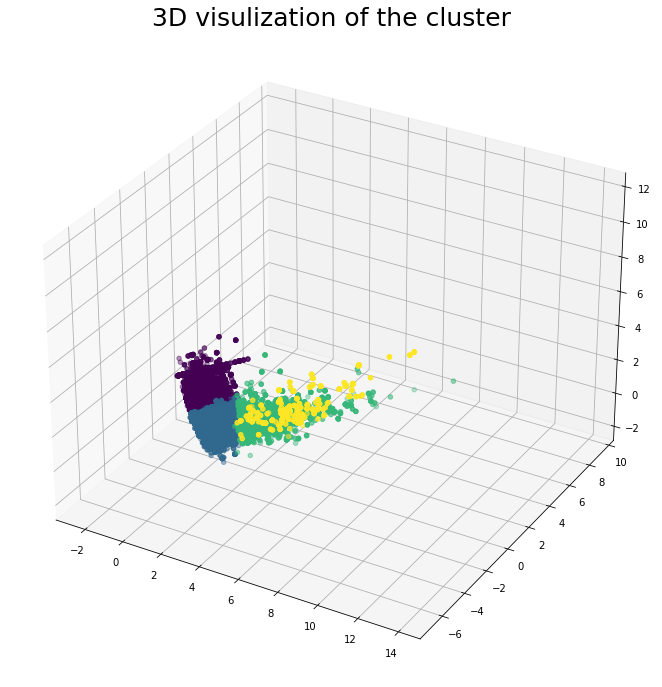

In [166]:
fig=plt.figure(figsize=(16,9))
ax=Axes3D(fig)
ax.set_title('3D visulization of the cluster', fontsize=25)
ax.scatter(Zomata_pca.iloc[:,0],Zomata_pca.iloc[:,1],Zomata_pca.iloc[:,2],c=cluster.labels_)
ax.scatter(cluster.cluster_centers_[:,0],cluster.cluster_centers_[:,1],cluster.cluster_centers_[:,2],c='red')

In [ ]:
plt.figure(figsize=(15,7))

plt.scatter(user_pv_pca[:,1],user_pv_pca[:,0],c=p)
plt.scatter(cluster.cluster_centers_[:,1],cluster.cluster_centers_[:,0],color="red")
plt.title(" 2D Visualization of the clusters",{'fontsize': 25})

Text(0.5, 1.0, '2D Visulization of clusters')

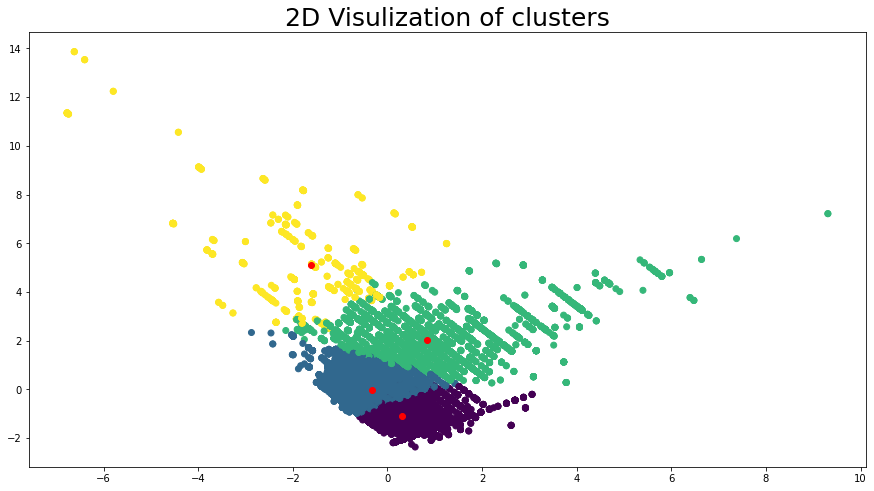

In [169]:
plt.figure(figsize=(15,8))
plt.scatter(Zomata_pca.iloc[:,1],Zomata_pca.iloc[:,0],c=cluster.labels_)
plt.scatter(cluster.cluster_centers_[:,1],cluster.cluster_centers_[:,0],color='red')
plt.title('2D Visulization of clusters',{'fontsize':25})

In [ ]:
#build a model using random forest and cross check with Linear Discrimanant analysis

In [171]:
X=Zomata_pca
y=cluster.labels_

In [172]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [ ]:
#Random forest classfication

In [182]:
from sklearn.ensemble import RandomForestClassifier


ran_model=RandomForestClassifier(random_state=20,n_estimators=200,max_depth=4)
ran_model.fit(X_train,y_train)

ypred=ran_model.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2632
           1       0.98      0.98      0.98      4688
           2       0.96      0.94      0.95      1206
           3       0.99      0.88      0.93       168

    accuracy                           0.98      8694
   macro avg       0.98      0.95      0.96      8694
weighted avg       0.98      0.98      0.98      8694



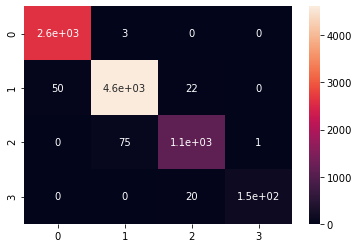

In [183]:
cm_ran= confusion_matrix(y_test, ypred)
sns.heatmap(cm_ran, annot=True)
plt.show()

In [ ]:
#LDA

In [184]:
model= LinearDiscriminantAnalysis()
model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

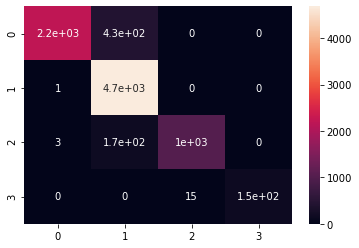

In [185]:
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_LDA= confusion_matrix(y_test, y_pred)
sns.heatmap(cm_LDA, annot=True)
plt.show()

In [186]:
from sklearn.metrics import accuracy_score
ac_LDA = accuracy_score(y_test, y_pred)
print("Accuracy Score:", ac_LDA)

Accuracy Score: 0.9285714285714286


In [187]:
from sklearn.metrics import classification_report
classification_2=classification_report(y_test,y_pred)
print(classification_2)

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      2632
           1       0.89      1.00      0.94      4688
           2       0.99      0.86      0.92      1206
           3       1.00      0.91      0.95       168

    accuracy                           0.93      8694
   macro avg       0.97      0.90      0.93      8694
weighted avg       0.94      0.93      0.93      8694



Interpretation:

    * Linear discriminant analysis was not good for this dataset because Random forest itself only giving best result.